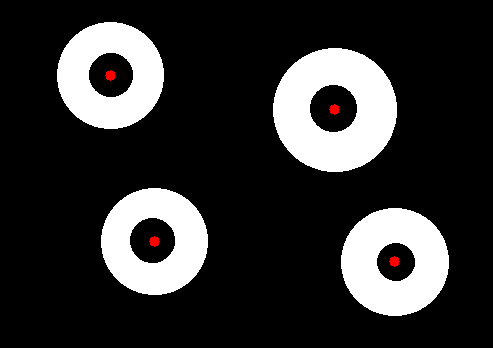

In [8]:
# Question no 1
#part (a)
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread("circle3.jpg")

# Convert the image to grayscale and threshold it
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find the contours of the objects in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop over the contours and calculate their centroids
for contour in contours:
    area = cv2.contourArea(contour)
    M = cv2.moments(contour)
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])

    # Draw a red dot at the centroid location in the original color image
    cv2.circle(img, (cx, cy), 5, (0, 0, 255), -1)

# Display the result
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


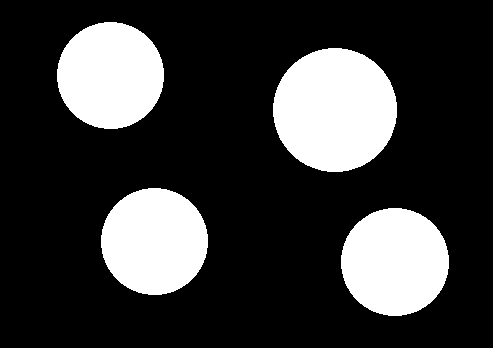

In [9]:
# Question no 1
#part (b)
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread("circle3.jpg")

# Convert the image to grayscale and threshold it
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find the contours of the objects in the binary image and calculate their centroids
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
centroids = []
for contour in contours:
    area = cv2.contourArea(contour)
    M = cv2.moments(contour)
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
    centroids.append((cx, cy))

# Create a mask and draw white circles at the centroid locations
mask = np.zeros_like(binary)
for centroid in centroids:
    cv2.circle(mask, centroid, 5, (255, 255, 255), -1)

# Perform morphological dilation using an elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (43, 43))
dilation = cv2.dilate(mask, kernel)

# Use bitwise OR operation to fill in the holes in the binary image
filled_img = cv2.bitwise_or(binary, dilation)

# Display the result
cv2_imshow(filled_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


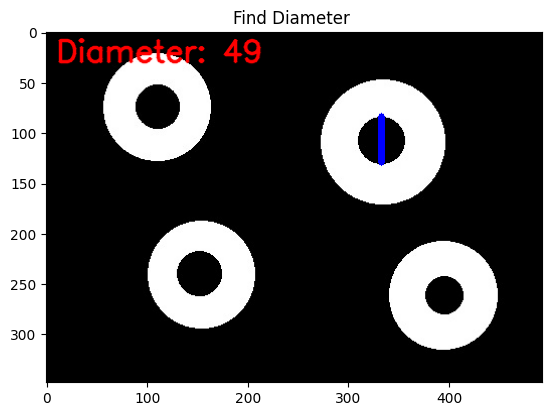

In [10]:
# Question no 1
#part (c)
import cv2
import matplotlib.pyplot as plt

imgC = cv2.imread('circle3.jpg')

gray = cv2.cvtColor(imgC, cv2.COLOR_RGB2GRAY)
_, binary = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

diameter = 0
diameter_x = 0
diameter_y = 0

# identifying circles
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 100 and area < 3000:
        x, y, w, h = cv2.boundingRect(cnt)
        if w > diameter:
            diameter_x = int(x + (w / 2))
            diameter_y = y
            diameter = w

cv2.line(imgC, (diameter_x, diameter_y), (diameter_x, diameter_y+w), (255, 0, 0), 5)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(imgC, 'Diameter: ' + str(diameter), (10, 30), font, 1, (0, 0, 255), 2, cv2.LINE_AA)


plt.imshow(cv2.cvtColor(imgC, cv2.COLOR_BGR2RGB))
plt.title('Find Diameter ')
plt.show()


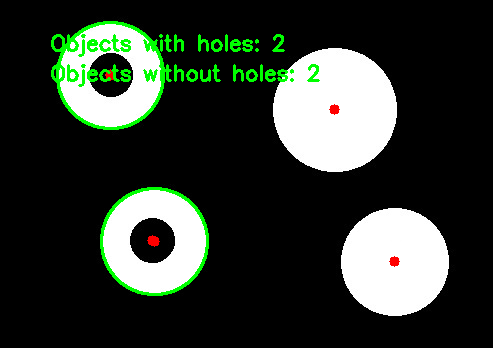

In [11]:
# Question no 1
#part (d)
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread("circles.jpg")

# Convert the image to grayscale and threshold it
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find the contours of the objects in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Count the number of objects with and without holes
with_holes = 0
without_holes = -2

# Loop over the contours and calculate their centroids
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    M = cv2.moments(contour)
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])

    # Draw a red dot at the centroid location in the original color image
    cv2.circle(img, (cx, cy), 5, (0, 0, 255), -1)

    # Check if the object has a hole by checking if its hierarchy value has a child contour
    if hierarchy[0][i][2] != -1:
        # Object has a hole
        with_holes += 1
        # Draw the contour in green color
        cv2.drawContours(img, [contour], 0, (0, 255, 0), 2)
    else:
        # Object doesn't have a hole
        without_holes =  without_holes+1

# Display the result
cv2.putText(img, f"Objects with holes: {with_holes}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.putText(img, f"Objects without holes: {without_holes}", (50, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


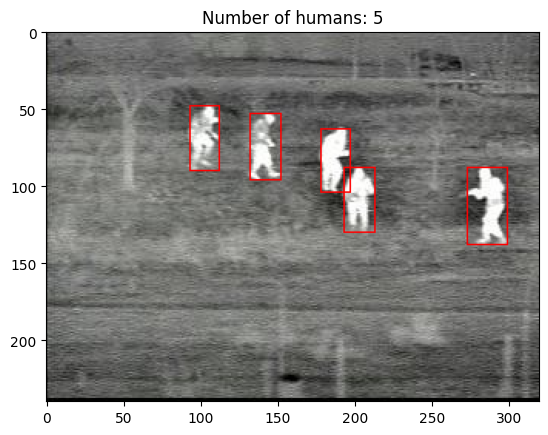

In [7]:
# Question no 2
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('thermal.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to create a binary image
_, binary = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through the contours to find the humans
humans = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 50:
        x, y, w, h = cv2.boundingRect(cnt)
        humans.append((x, y, w, h))

# Draw red bounding boxes around the humans
for human in humans:
    x, y, w, h = human
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 1)

# Display the image and the number of humans detected
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Number of humans: " + str(len(humans)))
plt.show()


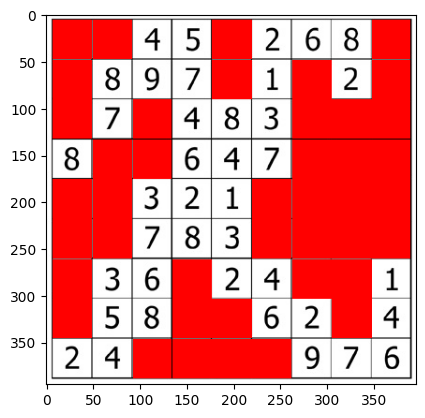

In [4]:
# Question no 3
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('soduku.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Finding contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the image to draw on
imgA = img.copy()

#identifying the empty squares
for cnt in contours:
    area = cv2.contourArea(cnt)

    # checking if a square we are interested in
    if area >1500 and area<2000:
        x, y, w, h = cv2.boundingRect(cnt)

        # checking if the square has a digit inside it
        rect_pixels = thresh[y:y+h, x:x+w]
        zeros = np.count_nonzero(rect_pixels == 0)
        if zeros<50:

            # draw bound and fill the square
            cv2.rectangle(imgA, (x, y), (x + w, y + h), (0, 0, 255), -1)


# Display the output image
plt.imshow(cv2.cvtColor(imgA, cv2.COLOR_BGR2RGB))
plt.show()


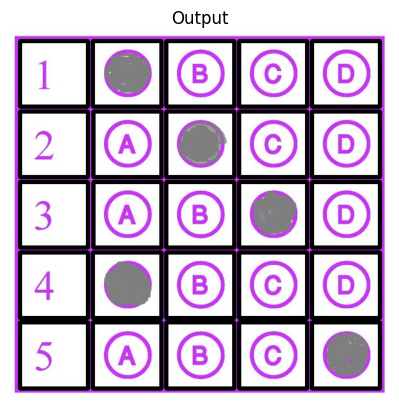

1:A,2:B,3:C,4:A,5:D


In [6]:
# Question no 4
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('bubble.jpg')
imgA=img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Finding contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[1])

answers={1:'A',2:'B',3:'C',4:'D'}

option=5
row_counter=1
output=''

selected=1

#identify the empty squares
for cnt in sorted_contours:
    area = cv2.contourArea(cnt)
    if area >10000 and area<12000:
        x, y, w, h = cv2.boundingRect(cnt)
        rect_pixels = thresh[y:y+h, x:x+w]
        zeros = np.count_nonzero(rect_pixels == 0)
        if zeros>4000:
            selected=option-1
        # draw boundary
        cv2.rectangle(imgA, (x,y), (x+w,y+h), (0,0,0), 5)
        option-=1
        if option==0:
            option=5
            output+=str(row_counter)+':'+str(answers[selected])+','
            row_counter+=1
            selected=1

output=output[:-1]

# Display result using matplotlib
plt.imshow(imgA)
plt.axis('off')
plt.title('Output')
plt.show()

print(output)
